Music recommender systems can suggest songs to users based on their listening patterns.

www.kaggle.com/c/kkbox-music-recommendation-challenge/dataDataset Description: In this task, you will be asked to predict a user's chances of listening to a song again after the first observed listening event has been triggered within a time window. If repeated listening events occur within a month of a user's very first observed listening event, its target in the training set is marked as 1, and otherwise as 0. The same rule applies to the testing set.орKKBOX provides a training dataset consisting of information about the first observed listening event for each unique user-song pair over a period of time. Metadata for each unique user and song pair is also provided. Using publicly available data to improve the accuracy of your forecast is encouraged.уеTrain and test data are selected from users' listening history over a certain period of time. Note that this time period is selected before the WSDM-KKBox churn forecast period. The train and test sets are separated by time, and the public/private division is based on unique user/song pairs.ь/песня.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [2]:
!pip install --upgrade pandas seaborn

In [2]:
# Загрузка данных
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
songs = pd.read_csv('songs.csv')
members = pd.read_csv('members.csv')
song_extra_info = pd.read_csv('song_extra_info.csv')

In [3]:
# Просмотр первых строк данных
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


поезд.csv

* msno: идентификатор пользователя
* song_id: идентификатор песни
* source_system_tab: имя вкладки, на которой было вызвано событие. Системные вкладки используются для категоризации функций мобильных приложений KKBOX. Например, вкладка my libraryсодержит функции для управления локальным хранилищем, а вкладка searchсодержит функции, относящиеся к поиску
* source_screen_name: имя макета, который видит пользователь.
* source_type: точка входа, где пользователь впервые воспроизводит музыку в мобильных приложениях. Точкой входа может быть album, online-playlist, song.. и т.д.
* цель: это целевая переменная. target=1 означает, что в течение месяца после самого первого наблюдаемого события прослушивания пользователя происходят повторяющиеся события прослушивания, target=0 в противном случае .учае .

In [4]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [5]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


песни.csv

Песни. Обратите внимание, что данные представлены в формате Unicode

* идентификатор_песни
* song_length: в мс
* жанр_ids: категория жанра. Некоторые песни имеют несколько жанров и разделены|
* имя_художника
* композитор
* автор текстов
* язык.

In [6]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


члены.csv

информация о пользователе

* мсно
* город
* др: возраст. Примечание. В этом столбце есть выбросы, судите сами
* пол
* зарегистрированный_через: метод регистрации
* Registration_init_time: формат%Y%m%d
* истечение_даты: формат%Y%m%d.

In [7]:
song_extra_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


song_extra_info.csv

* идентификатор_песни
* название песни - название песни
* isrc — международный стандартный код записи , теоретически может использоваться как идентификатор песни. Однако стоит отметить, что ISRC, полученные от поставщиков, не были официально проверены; поэтому информация в ISRC, такая как код страны и базовый год, может вводить в заблуждение/неправильно. Несколько песен могут использовать один ISRC, поскольку одну запись можно переиздавать несколько раз.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                object
 1   song_id             object
 2   source_system_tab   object
 3   source_screen_name  object
 4   source_type         object
 5   target              int64 
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


In [9]:
train.isnull().sum()

msno                       0
song_id                    0
source_system_tab      24849
source_screen_name    414804
source_type            21539
target                     0
dtype: int64

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   id                  int64 
 1   msno                object
 2   song_id             object
 3   source_system_tab   object
 4   source_screen_name  object
 5   source_type         object
dtypes: int64(1), object(5)
memory usage: 117.0+ MB


In [11]:
test.isnull().sum()

id                         0
msno                       0
song_id                    0
source_system_tab       8442
source_screen_name    162883
source_type             7297
dtype: int64

In [12]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [13]:
songs.isnull().sum()

song_id              0
song_length          0
genre_ids        94116
artist_name          0
composer       1071358
lyricist       1945306
language             1
dtype: int64

In [14]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [15]:
members.isnull().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

In [16]:
song_extra_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295971 entries, 0 to 2295970
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   song_id  object
 1   name     object
 2   isrc     object
dtypes: object(3)
memory usage: 52.6+ MB


In [17]:
song_extra_info.isnull().sum()

song_id         0
name            3
isrc       136548
dtype: int64

## Начальная визуализация

In [18]:
# Замена бесконечных значений на NaN
train.replace([np.inf, -np.inf], np.nan, inplace=True)
test.replace([np.inf, -np.inf], np.nan, inplace=True)
songs.replace([np.inf, -np.inf], np.nan, inplace=True)
members.replace([np.inf, -np.inf], np.nan, inplace=True)
song_extra_info.replace([np.inf, -np.inf], np.nan, inplace=True)

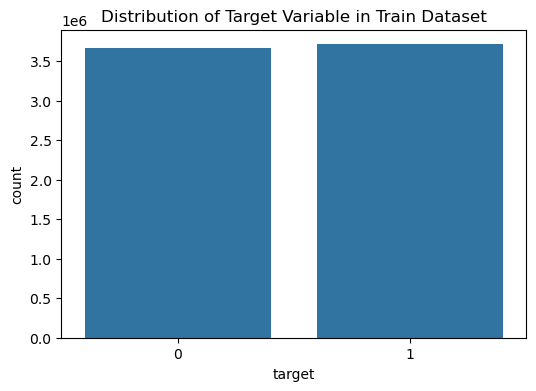

In [19]:
# Распределение целевой переменной (train dataset)
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='target')
plt.title('Distribution of Target Variable in Train Dataset')
plt.show()

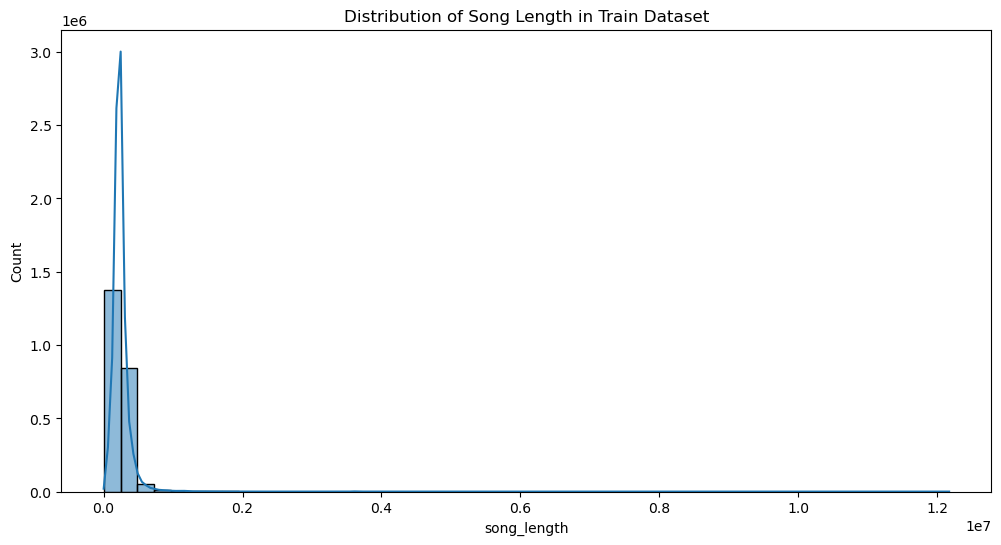

In [8]:
# Распределение 
plt.figure(figsize=(12, 6))
sns.histplot(data=songs, x='song_length', bins=50, kde=True)
plt.title('Distribution of Song Length in Train Dataset')
plt.show()

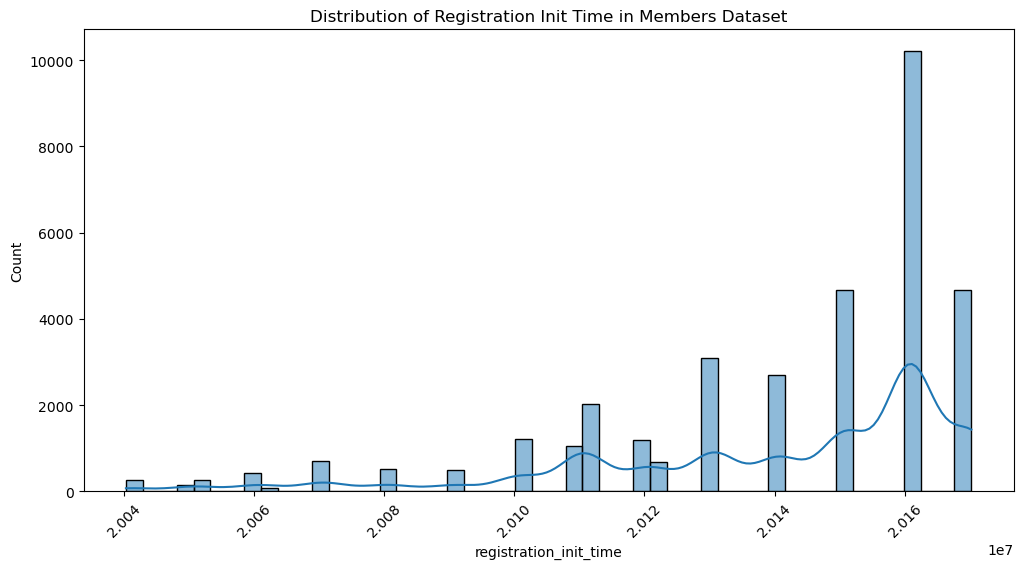

In [9]:
# Распределение по датам (members dataset)
plt.figure(figsize=(12, 6))
sns.histplot(data=members, x='registration_init_time', bins=50, kde=True)
plt.title('Distribution of Registration Init Time in Members Dataset')
plt.xticks(rotation=45)
plt.show()

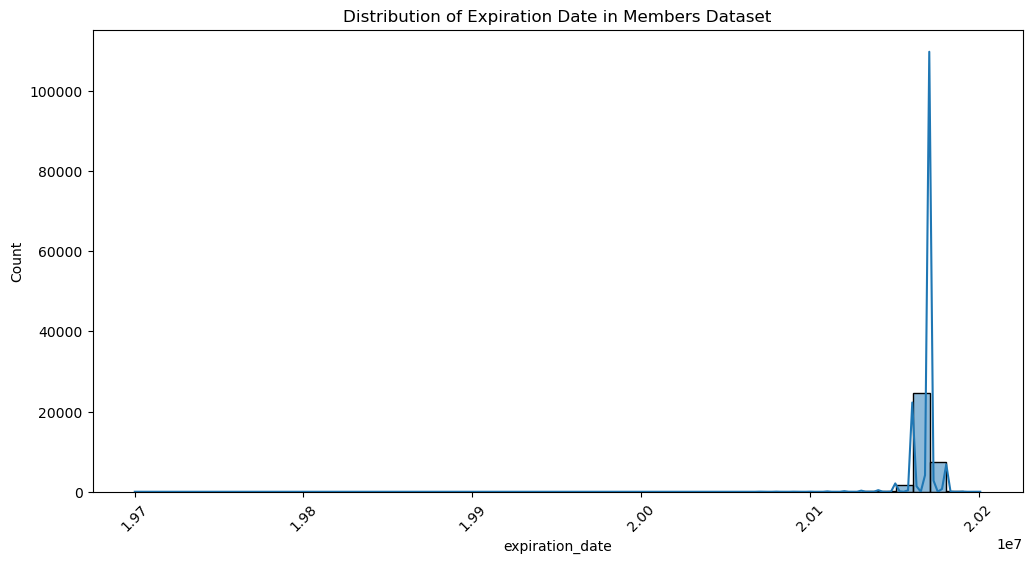

In [10]:
plt.figure(figsize=(12, 6))
sns.histplot(data=members, x='expiration_date', bins=50, kde=True)
plt.title('Distribution of Expiration Date in Members Dataset')
plt.xticks(rotation=45)
plt.show()

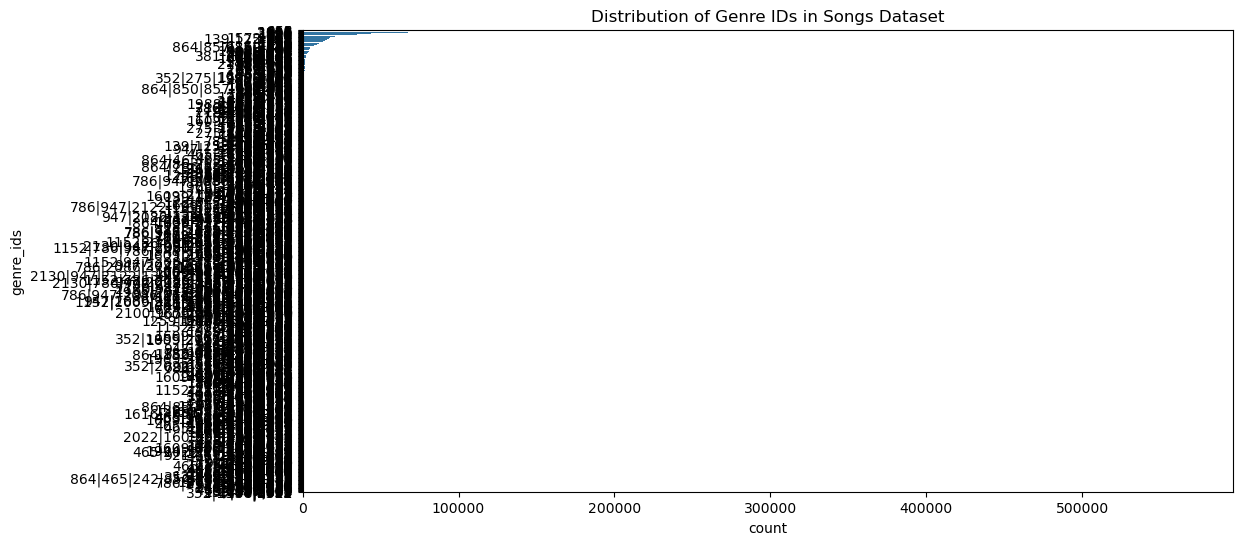

In [11]:
# Распределение по жанрам, артистам и языкам (songs dataset)
plt.figure(figsize=(12, 6))
sns.countplot(data=songs, y='genre_ids', order=songs['genre_ids'].value_counts().index)
plt.title('Distribution of Genre IDs in Songs Dataset')
plt.show()

D:\Users\irina\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35388 (\N{CJK UNIFIED IDEOGRAPH-8A3C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Users\irina\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32882 (\N{CJK UNIFIED IDEOGRAPH-8072}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Users\irina\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38899 (\N{CJK UNIFIED IDEOGRAPH-97F3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Users\irina\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27138 (\N{CJK UNIFIED IDEOGRAPH-6A02}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Users\irina\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22294 (\N{CJK UNIFIED IDEOGRAPH-5716}) missing from current font.
  fig.canvas.print_figure(bytes_

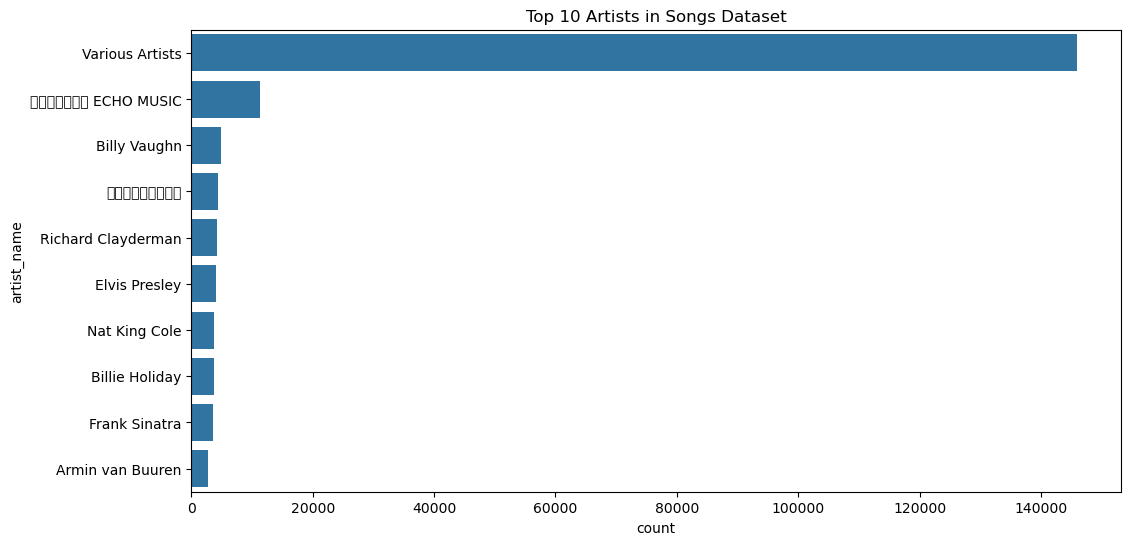

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(data=songs, y='artist_name', order=songs['artist_name'].value_counts().index[:10])
plt.title('Top 10 Artists in Songs Dataset')
plt.show()

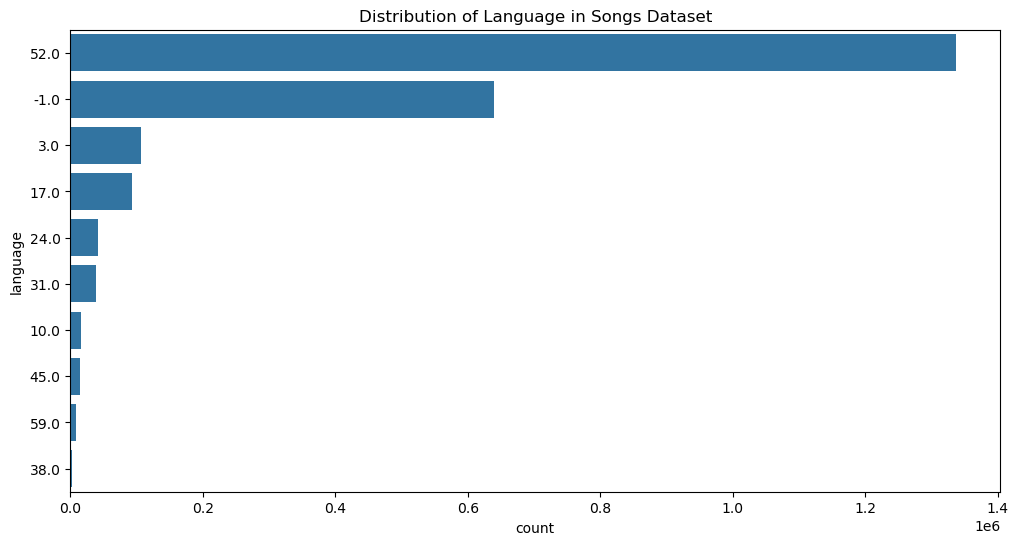

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(data=songs, y='language', order=songs['language'].value_counts().index)
plt.title('Distribution of Language in Songs Dataset')
plt.show()

## Предобработка

In [21]:
# Объединение данных для train
train = train.merge(songs, on='song_id', how='left')
train = train.merge(members, on='msno', how='left')
train = train.merge(song_extra_info, on='song_id', how='left')

In [22]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date,name,isrc
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,1,0,NaN,7,20120102,20171005,Good Grief,GBUM71602854
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,NaN,52.0,13,24,female,9,20110525,20170911,Lords of Cardboard,US3C69910183
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,13,24,female,9,20110525,20170911,Hip Hop Is Dead(Album Version (Edited)),USUM70618761
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,13,24,female,9,20110525,20170911,Disco Africa,GBUQH1000063
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,1,0,NaN,7,20120102,20171005,Sleep Without You,QM3E21606003


In [23]:
# Объединение данных для test
test = test.merge(songs, on='song_id', how='left')
test = test.merge(members, on='msno', how='left')
test = test.merge(song_extra_info, on='song_id', how='left')

In [24]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date,name,isrc
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library,224130.0,458,梁文音 (Rachel Liang),Qi Zheng Zhang,NaN,3.0,1,0,NaN,7,20160219,20170918,愛其實很殘忍,TWUM71400047
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library,320470.0,465,林俊傑 (JJ Lin),林俊傑,孫燕姿/易家揚,3.0,1,0,NaN,7,20160219,20170918,她說,TWB671005201
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist,315899.0,2022,Yu Takahashi (高橋優),Yu Takahashi,Yu Takahashi,17.0,1,0,NaN,4,20161117,20161124,subarashiki nichijo,JPWP01070260
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio,285210.0,465,U2,The Edge| Adam Clayton| Larry Mullen| Jr.,NaN,52.0,3,30,male,9,20070725,20170430,Hold Me| Thrill Me| Kiss Me| Kill Me,GBAAN0201228
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio,197590.0,873,Yoga Mr Sound,Neuromancer,NaN,-1.0,3,30,male,9,20070725,20170430,Om Yoga,ITO101121898


In [25]:
# Преобразование дат
train['registration_init_time'] = pd.to_datetime(train['registration_init_time'], format='%Y%m%d')
train['expiration_date'] = pd.to_datetime(train['expiration_date'], format='%Y%m%d')
test['registration_init_time'] = pd.to_datetime(test['registration_init_time'], format='%Y%m%d')
test['expiration_date'] = pd.to_datetime(test['expiration_date'], format='%Y%m%d')

In [26]:
# Создание новых признаков
train['membership_days'] = (train['expiration_date'] - train['registration_init_time']).dt.days
test['membership_days'] = (test['expiration_date'] - test['registration_init_time']).dt.days

In [27]:
# Заполнение пропусков
train = train.fillna(-1)
test = test.fillna(-1)

In [28]:
# Посмотрим на типы данных в категориальных колонках
categorical_features = ['source_system_tab', 'source_screen_name', 'source_type', 'genre_ids', 'artist_name', 'composer', 'lyricist', 'language']

# Выведем типы данных для категориальных колонок
for feature in categorical_features:
    print(f'{feature}: {train[feature].apply(type).value_counts()}')

source_system_tab: source_system_tab
<class 'str'>    7352569
<class 'int'>      24849
Name: count, dtype: int64
source_screen_name: source_screen_name
<class 'str'>    6962614
<class 'int'>     414804
Name: count, dtype: int64
source_type: source_type
<class 'str'>    7355879
<class 'int'>      21539
Name: count, dtype: int64
genre_ids: genre_ids
<class 'str'>    7258963
<class 'int'>     118455
Name: count, dtype: int64
artist_name: artist_name
<class 'str'>    7377304
<class 'int'>        114
Name: count, dtype: int64
composer: composer
<class 'str'>    5701712
<class 'int'>    1675706
Name: count, dtype: int64
lyricist: lyricist
<class 'str'>    4198606
<class 'int'>    3178812
Name: count, dtype: int64
language: language
<class 'float'>    7377418
Name: count, dtype: int64


In [29]:
# Преобразование категориальных данных в строки
categorical_features_1 = ['source_system_tab', 'source_screen_name', 'source_type',
                        'genre_ids', 'artist_name', 'composer', 'lyricist', 'language',
                        'city', 'bd', 'gender', 'registered_via']

In [30]:
for feature in categorical_features:
    train[feature] = train[feature].astype(str)
    test[feature] = test[feature].astype(str)

In [32]:
unseen_categories = []
for feature in categorical_features:
    train_categories = set(train[feature].unique())
    test_categories = set(test[feature].unique())
    unseen = test_categories - train_categories
    if unseen:
        unseen_categories.append((feature, unseen))
print(unseen_categories)

[('source_screen_name', {'Self profile more', 'Search Home', 'Discover Genre', 'My library_Search', 'Online playlist more', 'Local playlist more', 'Search Trends', 'Discover New', '-1', 'People local', 'Discover Chart', 'Explore', 'Payment', 'Discover Feature', 'People global', 'Album more', 'Artist more', 'Radio', 'My library', 'Concert', 'Unknown', 'Search', 'Others profile more'}), ('genre_ids', {'109|1609', '444|2122', '1152|139|94', '359|423', '2130|947|2086|374|2122', '1969|1572|359', '1609|947|958|2022', '1609|1259|2022', '1089', '2130|786|947|2086|2022|374|958', '1061', '921|1007', '109|2022', '765', '786|458', '1609|947|2022|958', '786|2122|947', '2045|437', '864|850|437|857|843', '1180|458', '388|726', '423|359', '947|2086|374|1609|2122|958', '1609|2122|947|2022', '2122|947|2022', '1609|2122|958|2022', '465|873|947', '166', '921|109', '1152|465|726', '388|958', '2130|359', '1969|2100|509', '275|444|1572', '786|2086|374|1609|2122|1259', '303'}), ('artist_name', {'Moose Blood',

In [33]:
# Проверка и замена недостающих значений
for feature in categorical_features:
    train_categories = set(train[feature].unique())
    test_categories = set(test[feature].unique())
    unseen = test_categories - train_categories
    if unseen:
        common_category = train[feature].mode()[0]  # Выбор наиболее часто встречающегося значения в тренировочном наборе данных
        test.loc[test[feature].isin(unseen), feature] = common_category

In [34]:
# Кодирование категориальных данных с помощью LabelEncoder
label_encoders = {}

for feature in categorical_features:
    le = LabelEncoder()
    train[feature] = le.fit_transform(train[feature])
    test[feature] = le.transform(test[feature])
    label_encoders[feature] = le

In [35]:
# Проверка данных
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,language,city,bd,gender,registered_via,registration_init_time,expiration_date,name,isrc,membership_days
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,2,8,7,1,206471.0,286,3278,14582,...,8,1,0,-1,7,2012-01-02,2017-10-05,Good Grief,GBUM71602854,2103
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,4,9,5,1,284584.0,91,31961,68,...,8,13,24,female,9,2011-05-25,2017-09-11,Lords of Cardboard,US3C69910183,2301
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,4,9,5,1,225396.0,91,21373,45058,...,8,13,24,female,9,2011-05-25,2017-09-11,Hip Hop Is Dead(Album Version (Edited)),USUM70618761,2301
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,4,9,5,1,255512.0,7,27440,36701,...,0,13,24,female,9,2011-05-25,2017-09-11,Disco Africa,GBUQH1000063,2301
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,2,8,7,1,187802.0,3,4473,8486,...,8,1,0,-1,7,2012-01-02,2017-10-05,Sleep Without You,QM3E21606003,2103


In [34]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,...,language,city,bd,gender,registered_via,registration_init_time,expiration_date,name,isrc,membership_days
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,4,9,4,224130.0,338,37301,49505,...,4,1,0,-1,7,2016-02-19,2017-09-18,愛其實很殘忍,TWUM71400047,577
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,4,9,4,320470.0,345,37131,70043,...,4,1,0,-1,7,2016-02-19,2017-09-18,她說,TWB671005201,577
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,4,0,10,315899.0,186,33389,63932,...,2,1,0,-1,4,2016-11-17,2016-11-24,subarashiki nichijo,JPWP01070260,7
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,4,15,8,285210.0,345,31572,58755,...,8,3,30,male,9,2007-07-25,2017-04-30,Hold Me| Thrill Me| Kiss Me| Kill Me,GBAAN0201228,3567
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,4,15,8,197590.0,487,33210,45824,...,0,3,30,male,9,2007-07-25,2017-04-30,Om Yoga,ITO101121898,3567


In [37]:
# Замена значений признака gender
train['gender'] = train['gender'].map({'female': 0, 'male': 1, '-1': -1})
test['gender'] = test['gender'].map({'female': 0, 'male': 1, '-1': -1})

## Визуализация

In [11]:
# Настройка параметров отображения
pd.set_option('mode.use_inf_as_na', True)

C:\Users\irina\AppData\Local\Temp\ipykernel_18032\3995938059.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)


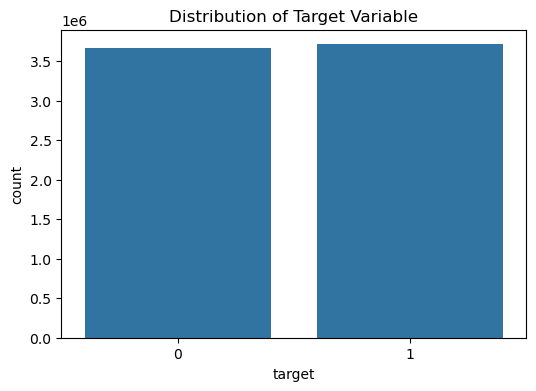

In [48]:
# Распределение целевой переменной
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='target')
plt.title('Distribution of Target Variable')
plt.show()

In [9]:
train['target'].unique()

array([1, 0], dtype=int64)

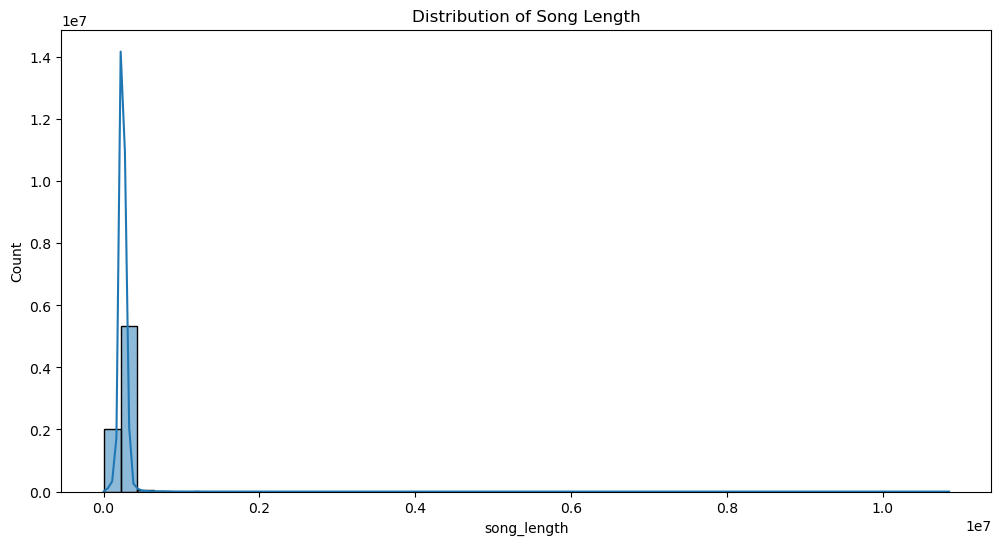

In [49]:
# Распределение song_length
plt.figure(figsize=(12, 6))
sns.histplot(train['song_length'], bins=50, kde=True)
plt.title('Distribution of Song Length')
plt.show()

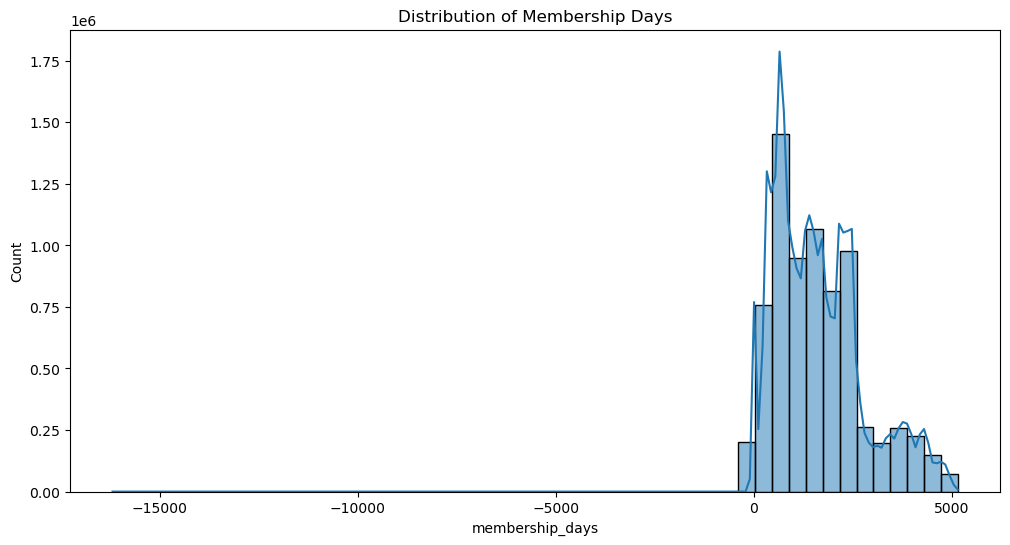

In [50]:
# Распределение membership_days
plt.figure(figsize=(12, 6))
sns.histplot(train['membership_days'], bins=50, kde=True)
plt.title('Distribution of Membership Days')
plt.show()

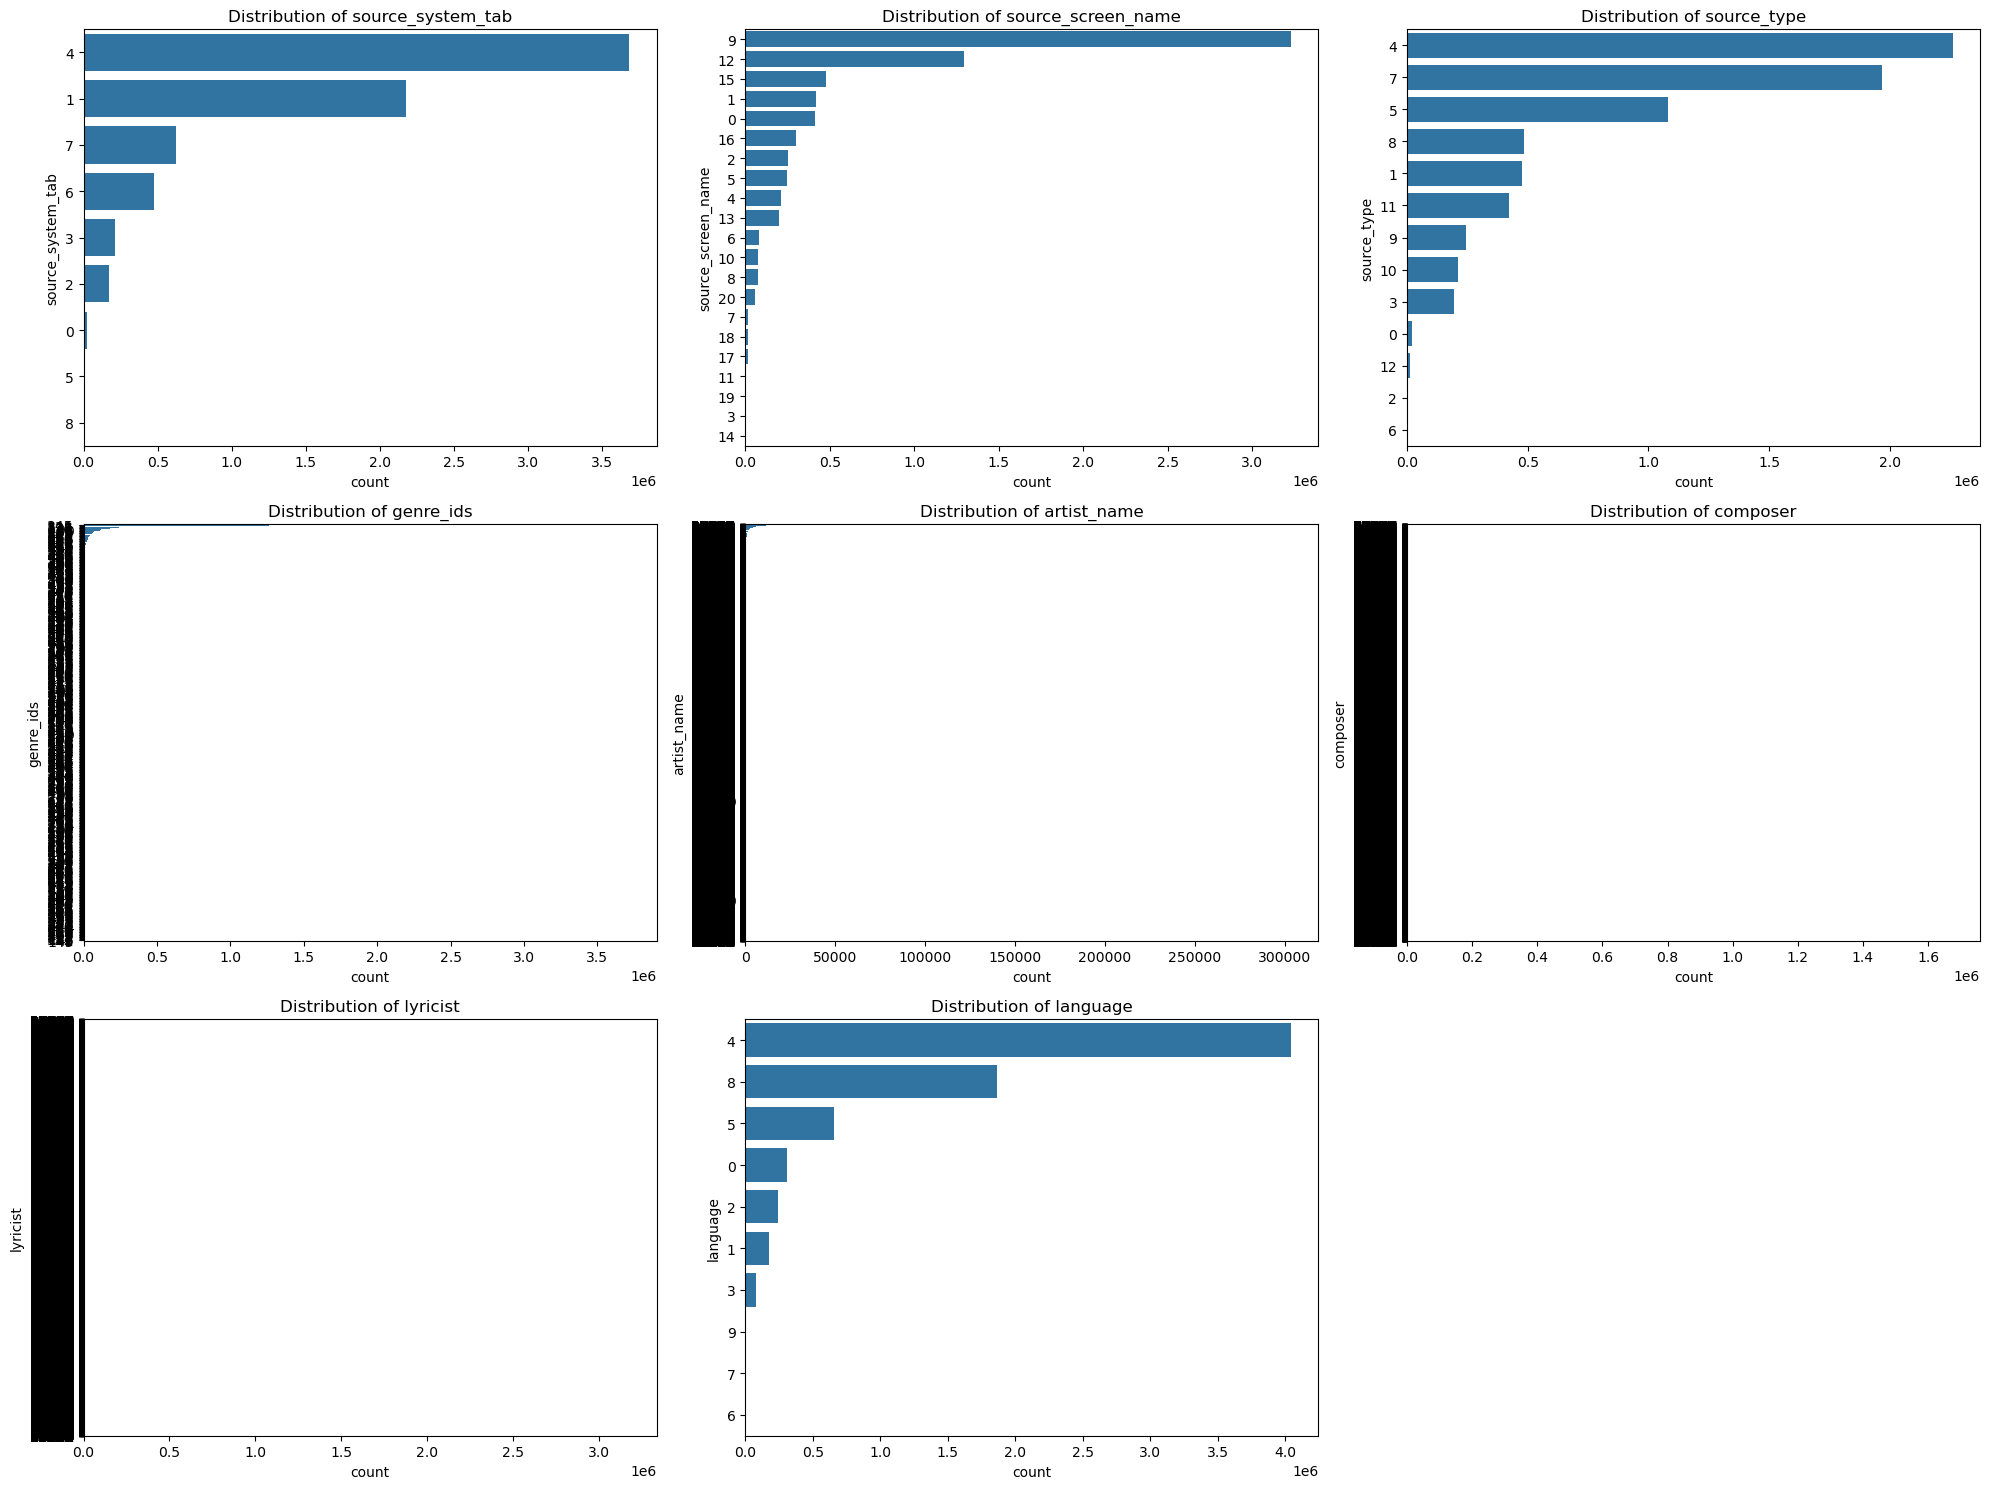

In [51]:
# Категориальные признаки
categorical_features = ['source_system_tab', 'source_screen_name', 'source_type', 'genre_ids', 'artist_name', 'composer', 'lyricist', 'language']

# Вывод распределения категориальных признаков
plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(y=train[feature], order=train[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

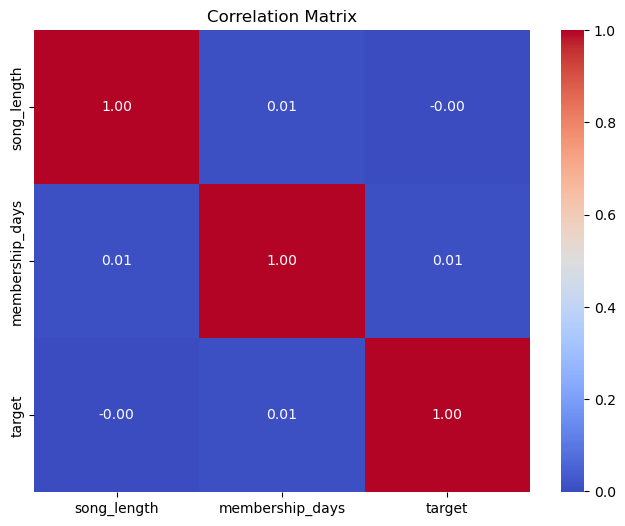

In [52]:
# Корреляционная матрица
numeric_features = ['song_length', 'membership_days']
corr_matrix = train[numeric_features + ['target']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

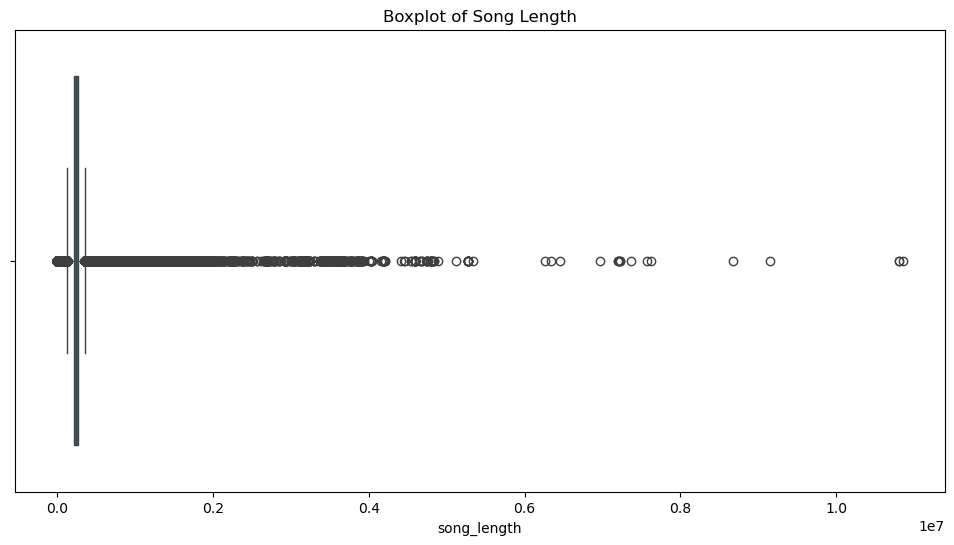

In [53]:
# Boxplot для song_length
plt.figure(figsize=(12, 6))
sns.boxplot(data=train, x='song_length')
plt.title('Boxplot of Song Length')
plt.show()

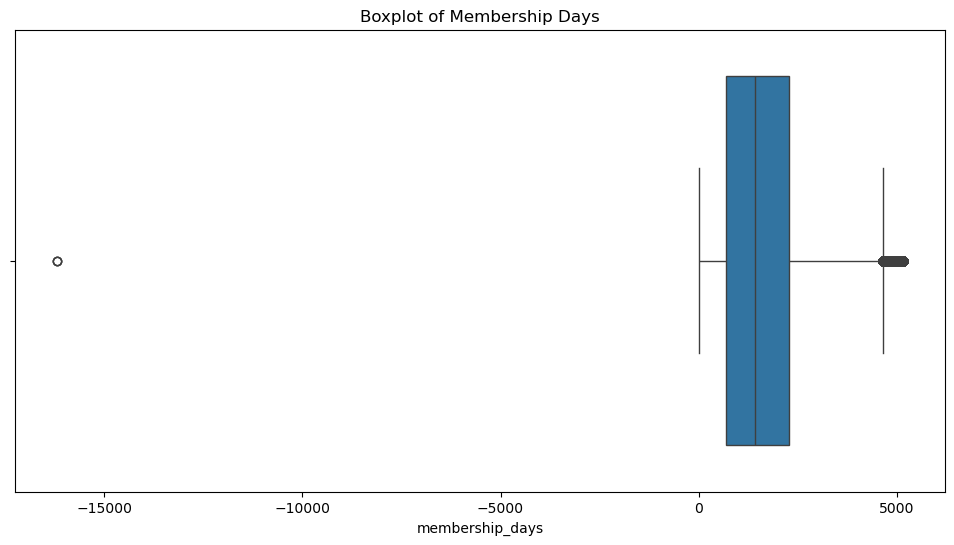

In [54]:
# Boxplot для membership_days
plt.figure(figsize=(12, 6))
sns.boxplot(data=train, x='membership_days')
plt.title('Boxplot of Membership Days')
plt.show()

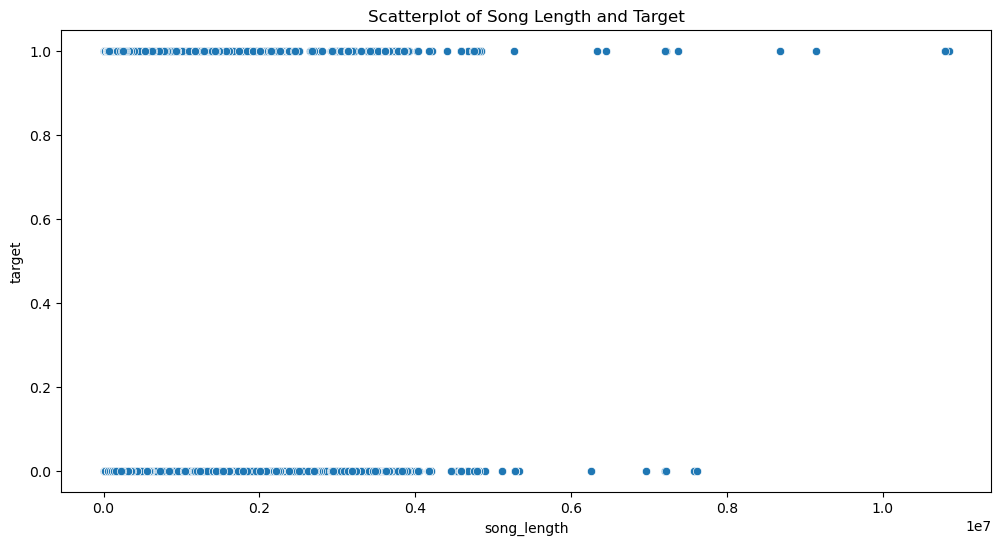

In [55]:
# Scatterplot для song_length и target
plt.figure(figsize=(12, 6))
sns.scatterplot(data=train, x='song_length', y='target')
plt.title('Scatterplot of Song Length and Target')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

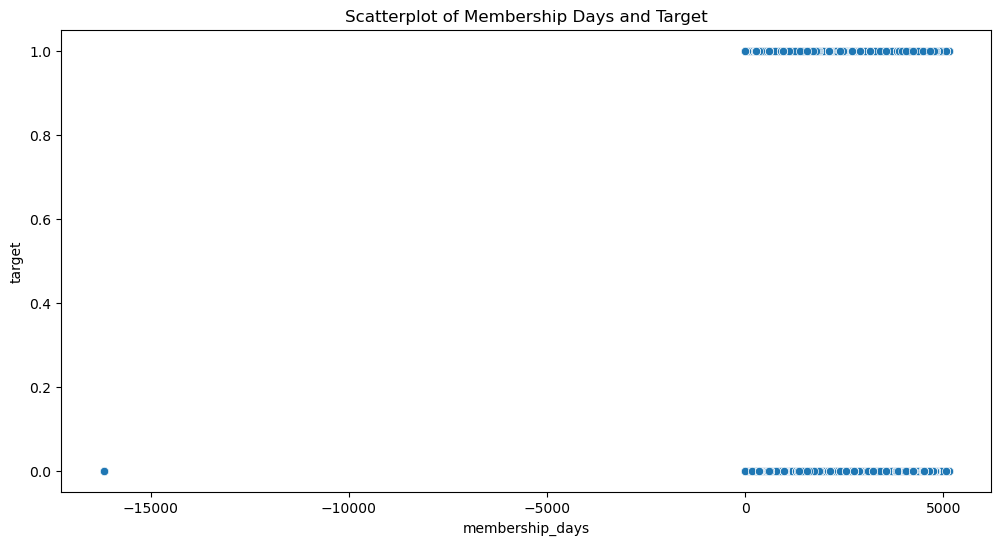

In [56]:
# Scatterplot для membership_days и target
plt.figure(figsize=(12, 6))
sns.scatterplot(data=train, x='membership_days', y='target')
plt.title('Scatterplot of Membership Days and Target')
plt.show

In [38]:
# Создание матрицы взаимодействия пользователей и песен
user_song_matrix = train.pivot(index='msno', columns='song_id', values='target').fillna(0)

# Преобразование матрицы в разреженный формат для экономии памяти
user_song_matrix_sparse = csr_matrix(user_song_matrix.values)

# Отобразим размер матрицы взаимодействия пользователей и песен
print("\nРазмер матрицы взаимодействия пользователей и песен:", user_song_matrix_sparse.shape)

D:\Users\irina\anaconda3\Lib\site-packages\pandas\core\reshape\reshape.py:143: RuntimeWarning: overflow encountered in scalar multiply
  num_cells = num_rows * num_columns


ValueError: negative dimensions are not allowed